In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xbg

In [4]:
df = pd.read_csv("final_project(5).csv")

In [5]:
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159995,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,...,-9.390451,8.096802,-0.875131,-1.413787,-0.363968,15.339392,4.364205,-3.831489,28.389858,1
159996,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,...,12.803189,0.841446,-0.682177,-5.047677,-0.017898,0.780130,6.387266,-1.374742,-1.623952,0
159997,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,10.531388,42.515821,1.420984,6.788916,...,-0.346570,-0.144098,0.738298,7.241041,0.215347,-12.155249,3.265263,1.230963,3.335471,1
159998,0.339237,7.609895,5.368414,-2.825481,4.046102,15.322603,7.805271,-10.233054,2.609986,4.251127,...,-0.307656,-0.601145,-3.443112,0.549931,0.206728,5.081980,1.701462,-0.279619,-1.986424,0


In [6]:
# for i in df:
#     df[i].hist()
#     plt.title(i)
#     plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [8]:
df.isna().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

In [9]:
df["x24"].unique()
df["x29"].unique()
df["x30"].unique()
df["x32"].unique()
df["x37"].unique()

array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

In [10]:
df["x24"].unique()

array(['euorpe', 'asia', 'america', nan], dtype=object)

In [11]:
df["x29"].unique()

array(['July', 'Aug', 'Jun', 'May', 'sept.', 'Apr', 'Nov', 'Oct', nan,
       'Mar', 'Feb', 'Dev', 'January'], dtype=object)

In [12]:
df["x30"].unique()

array(['tuesday', 'wednesday', 'thurday', 'monday', 'friday', nan],
      dtype=object)

In [13]:
df["x32"].unique()

array(['0.0%', '-0.02%', '-0.01%', '0.01%', '-0.03%', '0.02%', '-0.0%',
       '-0.04%', nan, '0.03%', '0.04%', '-0.05%', '0.05%'], dtype=object)

In [14]:
df["x32"] = df["x32"].str[:-1]

In [15]:
df["x32"]

0           0.0
1         -0.02
2         -0.01
3          0.01
4          0.01
          ...  
159995      0.0
159996    -0.01
159997     -0.0
159998    -0.02
159999     0.02
Name: x32, Length: 160000, dtype: object

In [16]:
df["x32"] = df["x32"].astype("float64")

In [17]:
df["x37"].unique()

array(['$1313.96', '$1962.78', '$430.47', ..., '$1588.65', '$439.21',
       '$-1229.34'], dtype=object)

In [18]:
df["x37"].nunique()

129198

In [19]:
df["y"].value_counts()

0    95803
1    64197
Name: y, dtype: int64

In [20]:
df["x37"].value_counts()

$-311.26     6
$-336.77     6
$237.4       6
$72.42       6
$341.26      6
            ..
$-505.21     1
$770.07      1
$74.62       1
$-1082.96    1
$-1229.34    1
Name: x37, Length: 129198, dtype: int64

In [21]:
df["x37"] = df["x37"].str[1:]

In [22]:
df["x37"].value_counts()

-311.26     6
-336.77     6
237.4       6
72.42       6
341.26      6
           ..
-505.21     1
770.07      1
74.62       1
-1082.96    1
-1229.34    1
Name: x37, Length: 129198, dtype: int64

In [23]:
df["x37"] = df["x37"].astype("float64")

In [24]:
df["x37"].describe()

count    159977.000000
mean          0.377628
std         999.945334
min       -4734.540000
25%        -691.370000
50%         -13.760000
75%         664.210000
max        5546.990000
Name: x37, dtype: float64

<AxesSubplot:xlabel='x37', ylabel='Density'>

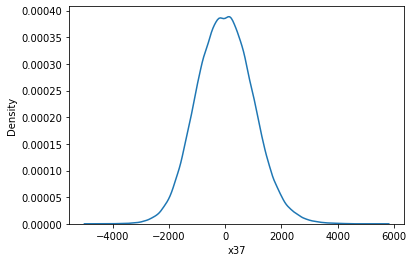

In [25]:
sns.kdeplot(df["x37"])

In [26]:
df.dropna(how='any', inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  float64
 7   x7      158392 non-null  float64
 8   x8      158392 non-null  float64
 9   x9      158392 non-null  float64
 10  x10     158392 non-null  float64
 11  x11     158392 non-null  float64
 12  x12     158392 non-null  float64
 13  x13     158392 non-null  float64
 14  x14     158392 non-null  float64
 15  x15     158392 non-null  float64
 16  x16     158392 non-null  float64
 17  x17     158392 non-null  float64
 18  x18     158392 non-null  float64
 19  x19     158392 non-null  float64
 20  x20     158392 non-null  float64
 21  x21     15

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158392 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  float64
 7   x7      158392 non-null  float64
 8   x8      158392 non-null  float64
 9   x9      158392 non-null  float64
 10  x10     158392 non-null  float64
 11  x11     158392 non-null  float64
 12  x12     158392 non-null  float64
 13  x13     158392 non-null  float64
 14  x14     158392 non-null  float64
 15  x15     158392 non-null  float64
 16  x16     158392 non-null  float64
 17  x17     158392 non-null  float64
 18  x18     158392 non-null  float64
 19  x19     158392 non-null  float64
 20  x20     158392 non-null  float64
 21  x21     15

In [29]:
df.reset_index(inplace=True, drop=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      158392 non-null  float64
 1   x1      158392 non-null  float64
 2   x2      158392 non-null  float64
 3   x3      158392 non-null  float64
 4   x4      158392 non-null  float64
 5   x5      158392 non-null  float64
 6   x6      158392 non-null  float64
 7   x7      158392 non-null  float64
 8   x8      158392 non-null  float64
 9   x9      158392 non-null  float64
 10  x10     158392 non-null  float64
 11  x11     158392 non-null  float64
 12  x12     158392 non-null  float64
 13  x13     158392 non-null  float64
 14  x14     158392 non-null  float64
 15  x15     158392 non-null  float64
 16  x16     158392 non-null  float64
 17  x17     158392 non-null  float64
 18  x18     158392 non-null  float64
 19  x19     158392 non-null  float64
 20  x20     158392 non-null  float64
 21  x21     15

In [31]:
categorical_features = ['x24','x29', 'x30']
passthrough_features = [c for c in df.columns if c not in categorical_features]

In [32]:
df_passth = df[passthrough_features]
df_categor = df[categorical_features]

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

onehot_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(sparse=False))]) 
preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('ohe', onehot_transformer , categorical_features )])

the_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [34]:
cate_fit = the_pipeline.fit(df_categor)
feature_names = the_pipeline.named_steps['preprocessor'].transformers_[0][1].named_steps["onehot"].get_feature_names_out(categorical_features)

In [35]:
ohe_array = cate_fit.transform(df_categor)

In [36]:
cat_df = pd.DataFrame(ohe_array, columns=feature_names)

In [37]:
df_passth.reset_index(inplace=True,drop=True)

In [38]:
feature_names

array(['x24_america', 'x24_asia', 'x24_euorpe', 'x29_Apr', 'x29_Aug',
       'x29_Dev', 'x29_Feb', 'x29_January', 'x29_July', 'x29_Jun',
       'x29_Mar', 'x29_May', 'x29_Nov', 'x29_Oct', 'x29_sept.',
       'x30_friday', 'x30_monday', 'x30_thurday', 'x30_tuesday',
       'x30_wednesday'], dtype=object)

In [39]:
train_test_df = pd.concat([df_passth, cat_df], axis=1)

In [40]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158392 entries, 0 to 158391
Data columns (total 68 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   x0             158392 non-null  float64
 1   x1             158392 non-null  float64
 2   x2             158392 non-null  float64
 3   x3             158392 non-null  float64
 4   x4             158392 non-null  float64
 5   x5             158392 non-null  float64
 6   x6             158392 non-null  float64
 7   x7             158392 non-null  float64
 8   x8             158392 non-null  float64
 9   x9             158392 non-null  float64
 10  x10            158392 non-null  float64
 11  x11            158392 non-null  float64
 12  x12            158392 non-null  float64
 13  x13            158392 non-null  float64
 14  x14            158392 non-null  float64
 15  x15            158392 non-null  float64
 16  x16            158392 non-null  float64
 17  x17            158392 non-nul

In [41]:
train_test_df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33',
       'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43',
       'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'y', 'x24_america',
       'x24_asia', 'x24_euorpe', 'x29_Apr', 'x29_Aug', 'x29_Dev', 'x29_Feb',
       'x29_January', 'x29_July', 'x29_Jun', 'x29_Mar', 'x29_May', 'x29_Nov',
       'x29_Oct', 'x29_sept.', 'x30_friday', 'x30_monday', 'x30_thurday',
       'x30_tuesday', 'x30_wednesday'],
      dtype='object')

In [42]:
X = train_test_df.drop("y", axis=1)
y = train_test_df["y"].values

In [43]:
X.isna().sum()

x0               0
x1               0
x2               0
x3               0
x4               0
                ..
x30_friday       0
x30_monday       0
x30_thurday      0
x30_tuesday      0
x30_wednesday    0
Length: 67, dtype: int64

Train 60% - X_train, y_train
test 20% - X_test,y_test
validation 20% - X_val, y_val

In [44]:
X

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158387,-0.487024,-4.270269,0.417395,-1.992423,1.757552,-1.167819,0.606860,41.084463,-1.923188,-2.374213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
158388,0.825477,4.804368,22.161535,11.371303,1.715901,6.990759,32.221207,-12.278038,-3.861086,6.715126,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
158389,-0.802489,5.362696,7.243419,-7.496074,2.295250,-2.756067,10.531388,42.515821,1.420984,6.788916,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
158390,0.339237,7.609895,5.368414,-2.825481,4.046102,15.322603,7.805271,-10.233054,2.609986,4.251127,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8, random_state=1)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5,random_state=1)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)


(126713, 67)
(126713,)
(15839, 67)
(15839,)
(15840, 67)
(15840,)


(None, None)

In [46]:
X_train.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33',
       'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43',
       'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x24_america', 'x24_asia',
       'x24_euorpe', 'x29_Apr', 'x29_Aug', 'x29_Dev', 'x29_Feb', 'x29_January',
       'x29_July', 'x29_Jun', 'x29_Mar', 'x29_May', 'x29_Nov', 'x29_Oct',
       'x29_sept.', 'x30_friday', 'x30_monday', 'x30_thurday', 'x30_tuesday',
       'x30_wednesday'],
      dtype='object')

In [47]:
len(y_train)

126713

In [48]:
unbalanced_train_df = pd.concat([X_train, pd.DataFrame(y_train, columns=["y"])], axis=1)

In [49]:
unbalanced_train_df.dropna(how="any", inplace=True)

In [50]:
unbalanced_train_df.reset_index(inplace=True,drop=True)

In [51]:
unbalanced_train_df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x25', 'x26', 'x27', 'x28', 'x31', 'x32', 'x33',
       'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43',
       'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x24_america', 'x24_asia',
       'x24_euorpe', 'x29_Apr', 'x29_Aug', 'x29_Dev', 'x29_Feb', 'x29_January',
       'x29_July', 'x29_Jun', 'x29_Mar', 'x29_May', 'x29_Nov', 'x29_Oct',
       'x29_sept.', 'x30_friday', 'x30_monday', 'x30_thurday', 'x30_tuesday',
       'x30_wednesday', 'y'],
      dtype='object')

In [52]:
# unbalanced_train_df.rename({0:"y"}, axis=1, inplace=True)

In [53]:
unbalanced_train_df["y"].value_counts()

0.0    60642
1.0    40757
Name: y, dtype: int64

In [54]:
X_train_us = unbalanced_train_df.drop("y", axis=1)
y_train_us = unbalanced_train_df["y"]

In [55]:
# !pip install imblearn

In [56]:
from imblearn.under_sampling import RandomUnderSampler 
# Undersample the dataset using the RandomUnderSampler 
# Undersample the majority class only
us = RandomUnderSampler(sampling_strategy='majority')

X_train_us, y_train_us = us.fit_resample(X_train_us, y_train_us)
# Plot the new class distributions for y using the same funnction as above. 
# plot_class_dist(y_us_maj)

In [57]:
y_train_us.value_counts()

0.0    40757
1.0    40757
Name: y, dtype: int64

In [58]:
X_train_us

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x29_Mar,x29_May,x29_Nov,x29_Oct,x29_sept.,x30_friday,x30_monday,x30_thurday,x30_tuesday,x30_wednesday
0,0.095109,-2.797431,19.652928,3.171968,6.436443,5.135890,28.573880,-22.329672,12.900836,-5.200244,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.170278,1.131084,-32.039101,1.507255,-6.745993,5.805590,-46.582445,-46.929462,-19.980124,1.503715,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.265022,7.607008,-17.640021,0.226839,0.318703,-10.802886,-25.647265,-28.977258,-4.419238,-3.077108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.179773,3.498573,-29.730743,-3.832607,-10.855599,-14.412335,-43.226266,-16.488083,1.254324,-0.701706,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.554377,0.210795,21.710964,8.765775,-6.149749,-8.116541,31.566110,-0.288254,3.288675,10.614104,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81509,-0.143081,-9.697466,-5.706197,-4.159840,4.684302,9.538698,-8.296382,27.821411,-1.344940,12.067365,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81510,0.421385,8.096033,0.891154,-5.126830,10.715397,3.317816,1.295671,18.583731,-5.014449,-2.754488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81511,-0.669274,-9.094324,-5.392812,11.537946,-7.688915,-3.767291,-7.840744,12.315755,2.203263,-3.262308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
81512,-0.760842,10.991651,-0.628256,13.274358,-4.716815,-7.255607,-0.913438,25.230126,14.079720,-7.478500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


- Train 60% - Reduce from 56,955 to 45660 for balancing dataset
- test 20%
- validation 20%

In [59]:
import xgboost as xgb

dmatrix_train = xgb.DMatrix(X_train,y_train)

dmatrix_train_us = xgb.DMatrix(X_train_us,y_train_us)

dmatrix_test = xgb.DMatrix(X_test,y_test)

dmatrix_val = xgb.DMatrix(X_valid,y_valid)

In [60]:
print(X_train.shape)
print(y_train.shape)
print(X_train_us.shape)
print(y_train_us.shape)
print(X_test.shape)
print(y_test.shape)
print(X_valid.shape)
print(y_valid.shape)

(126713, 67)
(126713,)
(81514, 67)
(81514,)
(15840, 67)
(15840,)
(15839, 67)
(15839, 67)


In [61]:
import tensorflow as tf
tf.random.set_seed(58)

In [63]:
callback = [
  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10,mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.05)
]

gelu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(258, activation='gelu', input_shape=(67,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(258, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(258, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(258, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(258, activation='gelu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

gelu_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
gelu_model.fit(X_train, y_train, batch_size=50, epochs=5,  validation_data=[X_valid, y_valid]) #callbacks=callback,

test_loss, test_acc = gelu_model.evaluate(X_valid,  y_valid, batch_size=5000, verbose=2)

print('\nValid accuracy:', test_acc)

Epoch 1/5


c:\Users\drsco\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2531/2535 [============================>.] - ETA: 0s - loss: 0.4223 - accuracy: 0.8268

c:\Users\drsco\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2535/2535 [==============================] - 23s 8ms/step - loss: 0.4221 - accuracy: 0.8269 - val_loss: 0.2586 - val_accuracy: 0.8948
Epoch 2/5
2535/2535 [==============================] - 20s 8ms/step - loss: 0.2222 - accuracy: 0.9129 - val_loss: 0.2091 - val_accuracy: 0.9177
Epoch 3/5
2535/2535 [==============================] - 19s 7ms/step - loss: 0.1736 - accuracy: 0.9351 - val_loss: 0.1600 - val_accuracy: 0.9384
Epoch 4/5
2535/2535 [==============================] - 18s 7ms/step - loss: 0.1495 - accuracy: 0.9475 - val_loss: 0.1614 - val_accuracy: 0.9416
Epoch 5/5
2535/2535 [==============================] - 19s 8ms/step - loss: 0.1376 - accuracy: 0.9523 - val_loss: 0.1278 - val_accuracy: 0.9562
4/4 - 0s - loss: 0.1278 - accuracy: 0.9562 - 245ms/epoch - 61ms/step

Test accuracy: 0.9561840891838074


In [71]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print("Validation Set Accuracy: ", accuracy_score(X_valid, y_valid))
print("Validation Set Precision: ", precision_score(X_valid, y_valid))
print("Validation Set Recall: ", recall_score(X_valid, y_valid))


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [66]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=5,
    verbose=3,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [67]:
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([100, 300])) 
HP_DROPOUT = hp.HParam('dropout', hp.Discrete([0.0, 0.2]))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam']))
HP_ACTIVATION = hp.HParam('activation', hp.Discrete(['gelu', 'selu', 'swish', 'relu', 'tanh']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning/').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATION, HP_DROPOUT, HP_OPTIMIZER, HP_NUM_UNITS],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [74]:

def train_test_model(hparams):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation=hparams[HP_ACTIVATION]),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax),
  ])
  model.compile(
      optimizer=hparams[HP_OPTIMIZER],
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'],
  )

  model.fit(X_train, y_train, callbacks=callback, batch_size=50, epochs=10, validation_data=[X_valid, y_valid])
  _, accuracy = model.evaluate(X_valid, y_valid, batch_size=50, ) 
  return accuracy

In [69]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [75]:
session_num = 0

for activation in HP_ACTIVATION.domain.values: 
  for dropout_rate in HP_DROPOUT.domain.values:
    for optimizer in HP_OPTIMIZER.domain.values:
      for num_units in HP_NUM_UNITS.domain.values:
        hparams = {
          HP_ACTIVATION: activation,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
          HP_NUM_UNITS: num_units
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'activation': 'gelu', 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
Epoch 1/10
2535/2535 [==============================] - 29s 10ms/step - loss: 0.4425 - accuracy: 0.8260 - val_loss: 0.2404 - val_accuracy: 0.9035
Epoch 2/10
2535/2535 [==============================] - 27s 11ms/step - loss: 0.2198 - accuracy: 0.9140 - val_loss: 0.2169 - val_accuracy: 0.9199
Epoch 3/10
2535/2535 [==============================] - 26s 10ms/step - loss: 0.1728 - accuracy: 0.9363 - val_loss: 0.1623 - val_accuracy: 0.9396
Epoch 4/10
2535/2535 [==============================] - 24s 9ms/step - loss: 0.1508 - accuracy: 0.9471 - val_loss: 0.1676 - val_accuracy: 0.9418
Epoch 5/10
2535/2535 [==============================] - 26s 10ms/step - loss: 0.1389 - accuracy: 0.9513 - val_loss: 0.1311 - val_accuracy: 0.9535
Epoch 6/10
2535/2535 [==============================] - 27s 11ms/step - loss: 0.1289 - accuracy: 0.9559 - val_loss: 0.1515 - val_accuracy: 0.9453
Epoch 7/10
2535/2535 

In [78]:
#{'activation': 'selu', 'dropout': 0.0, 'optimizer': 'adam', 'num_units': 300}
callback = [
  tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10,mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.05)
]

selu_model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='selu', input_shape=(67,)),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(300, activation='selu'),
    tf.keras.layers.Dropout(0.0),
    tf.keras.layers.Dense(1, activation='sigmoid')   
])

selu_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])
selu_model.fit(X_train, y_train, batch_size=50, epochs=25,  validation_data=[X_valid, y_valid]) #callbacks=callback,

test_loss, test_acc = selu_model.evaluate(X_valid,  y_valid, batch_size=50, verbose=2)

print('\nValid accuracy:', test_acc)

Epoch 1/25


c:\Users\drsco\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2533/2535 [============================>.] - ETA: 0s - loss: 0.4534 - accuracy: 0.8179

c:\Users\drsco\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2535/2535 [==============================] - 30s 12ms/step - loss: 0.4532 - accuracy: 0.8179 - val_loss: 0.2561 - val_accuracy: 0.8959
Epoch 2/25
2535/2535 [==============================] - 34s 14ms/step - loss: 0.2151 - accuracy: 0.9160 - val_loss: 0.2022 - val_accuracy: 0.9239
Epoch 3/25
2535/2535 [==============================] - 33s 13ms/step - loss: 0.1632 - accuracy: 0.9412 - val_loss: 0.2295 - val_accuracy: 0.9162
Epoch 4/25
2535/2535 [==============================] - 34s 13ms/step - loss: 0.1402 - accuracy: 0.9510 - val_loss: 0.1461 - val_accuracy: 0.9477
Epoch 5/25
2535/2535 [==============================] - 35s 14ms/step - loss: 0.1269 - accuracy: 0.9566 - val_loss: 0.1262 - val_accuracy: 0.9568
Epoch 6/25
2535/2535 [==============================] - 34s 13ms/step - loss: 0.1161 - accuracy: 0.9608 - val_loss: 0.1162 - val_accuracy: 0.9592
Epoch 7/25
2535/2535 [==============================] - 36s 14ms/step - loss: 0.1101 - accuracy: 0.9626 - val_loss: 0.1119 - val_accura

In [87]:
NN_predictions = selu_model.predict(X_valid)
NN_prediction_labels = [int(p>=0.5) for p in NN_predictions]

In [97]:
cf_matrix = tf.math.confusion_matrix(NN_prediction_labels, y_valid)

In [95]:
# cf_matrix = np.array([[9114,  332],
#        [ 365, 6028]])

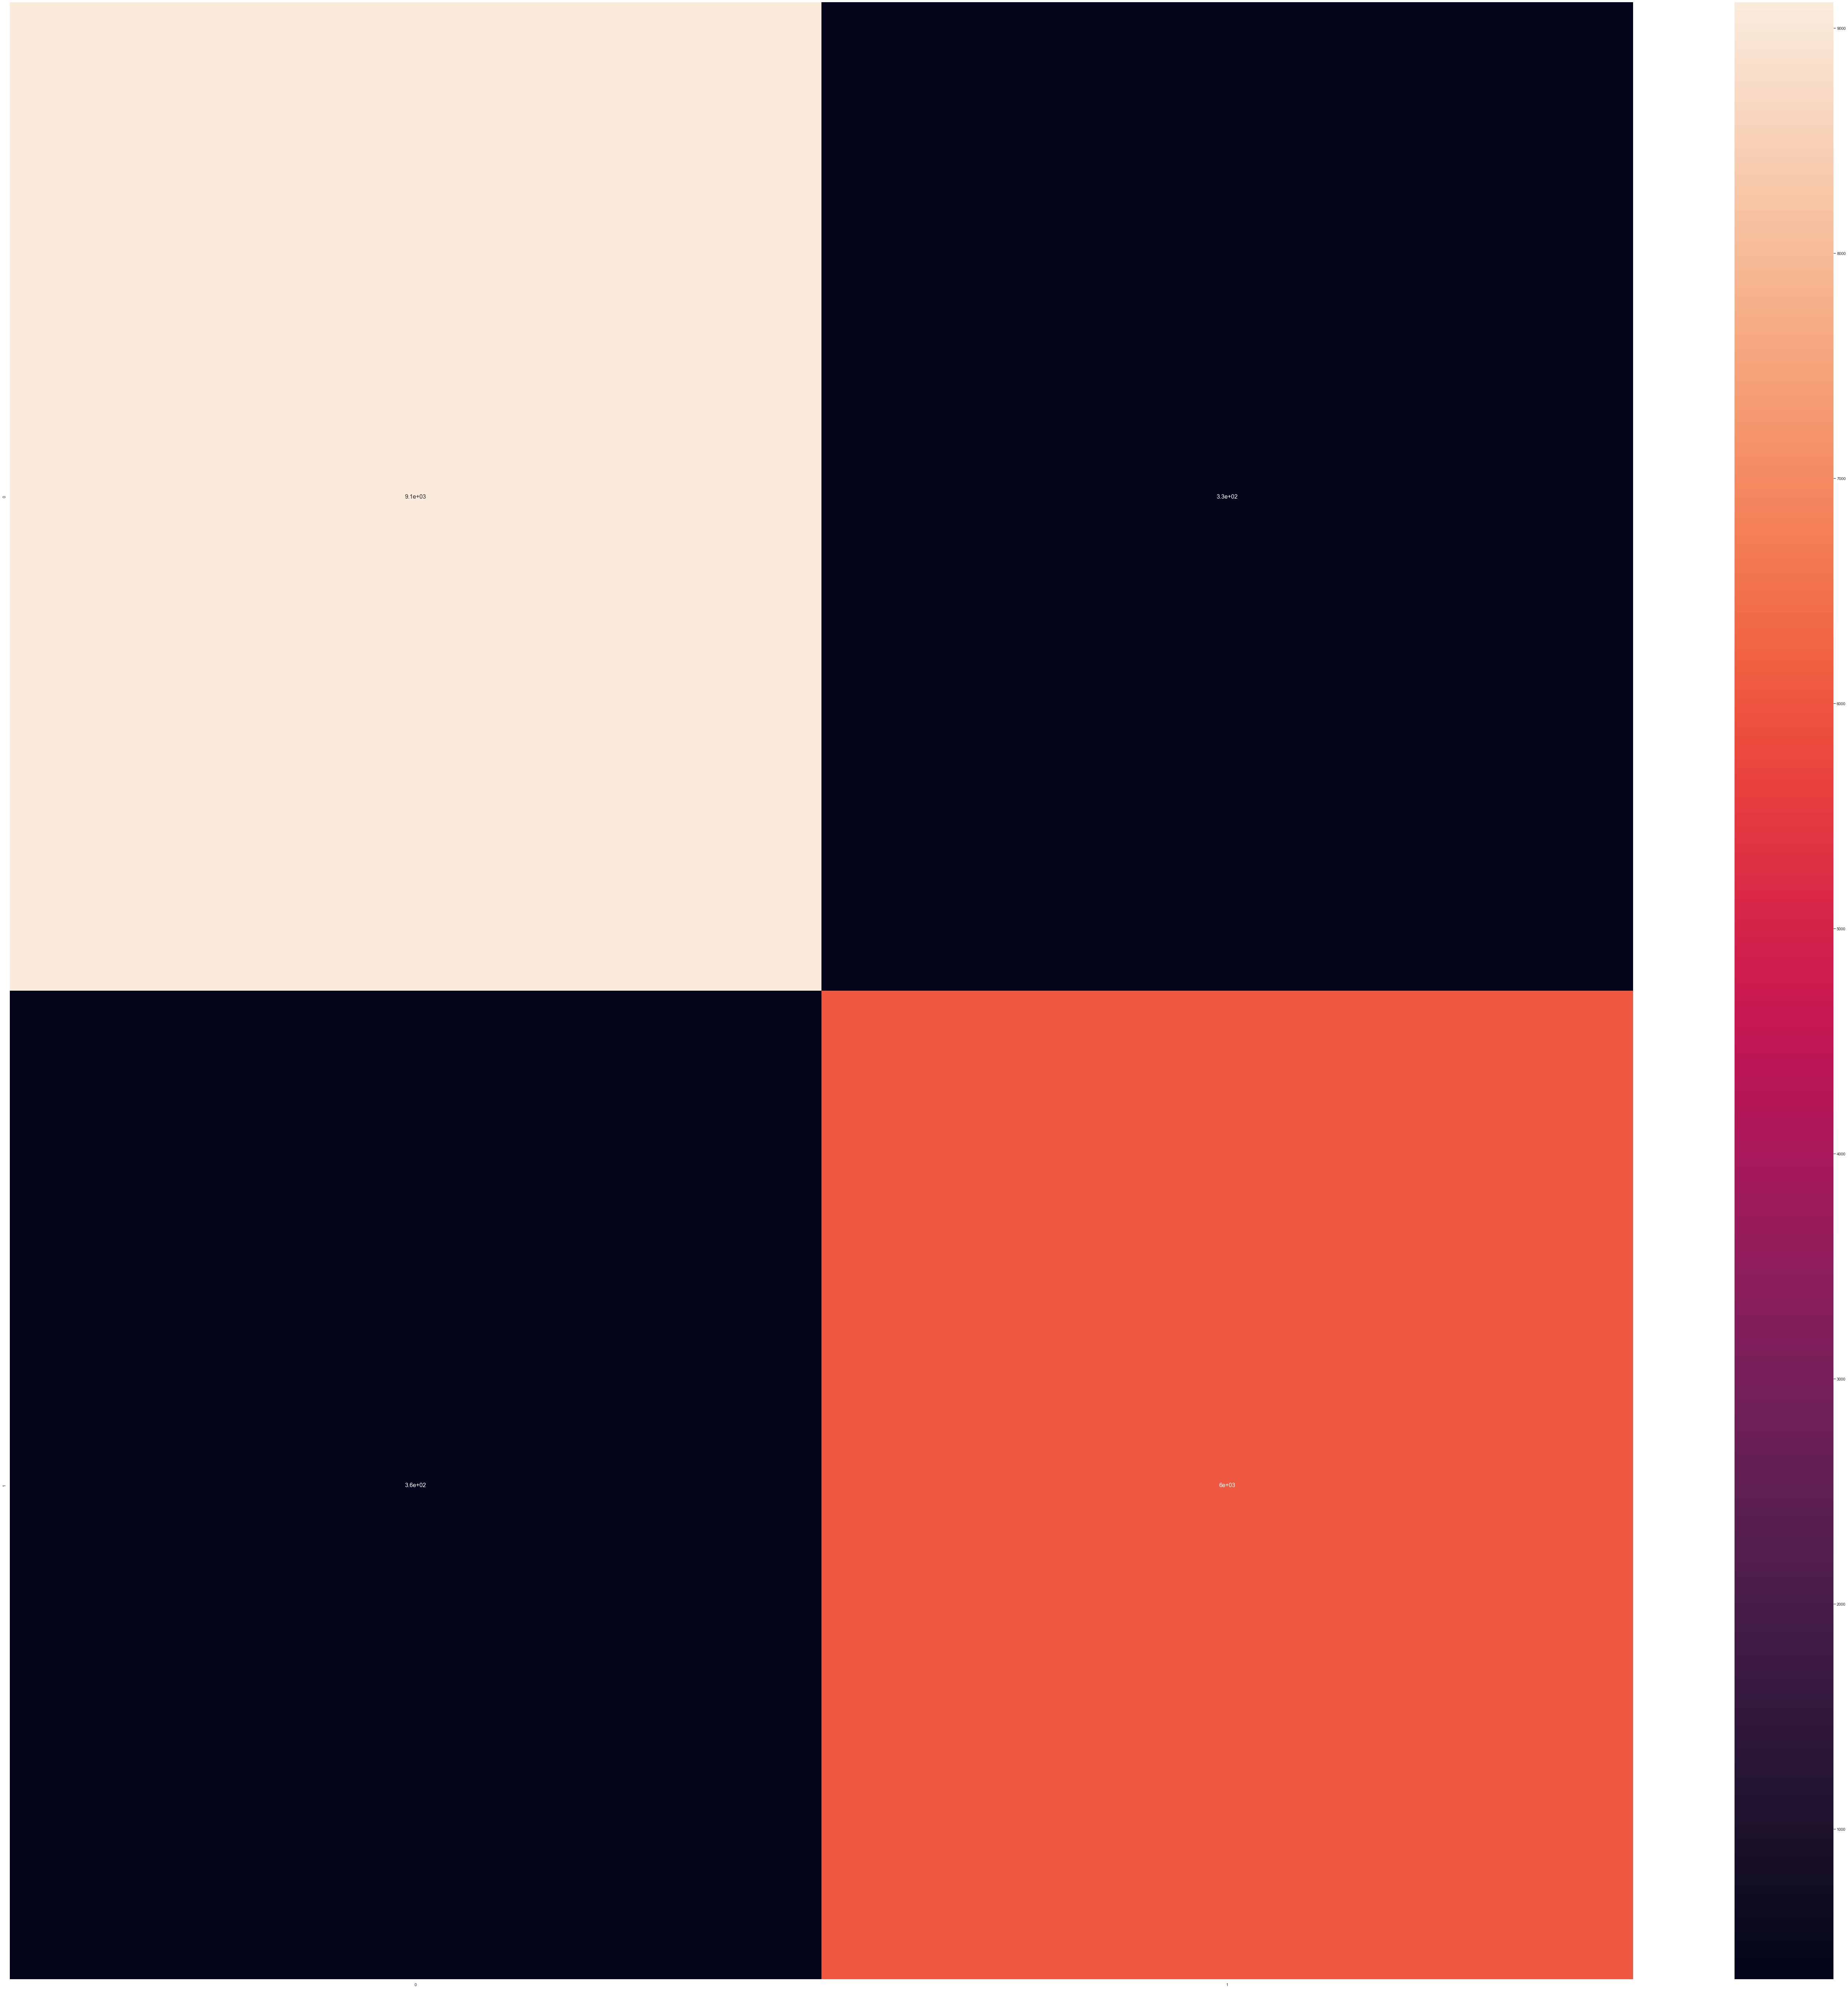

In [107]:
import seaborn as sns
sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 16})
sns.set(rc = {'figure.figsize':(20,20)})